In [3]:
#Importing required librabries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
#Loading Data in data

data = pd.read_csv(r"G:\Data Scientist\Youtube practice\House Prediction System\Bengaluru_House_Data.csv")

In [5]:
#Viewing data 
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


###Data Preprocessing 

In [8]:
#Dropping columns which is not required 

data.drop(columns = ["area_type", "availability", "society"], inplace = True)

In [9]:
data.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [11]:
#Filling nun values 
data["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [12]:
data['location'] = data['location'].fillna('Whitefield')

In [13]:
data["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [14]:
data['size'] = data['size'].fillna('2 BHK')

In [15]:
data["bath"].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [16]:
data['bath'] = data['bath'].fillna('2.0')

In [17]:
data["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [18]:
data['balcony'] = data['balcony'].fillna('2.0')

In [19]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [20]:
data.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [21]:
data.info()   #no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  object 
 4   balcony     13320 non-null  object 
 5   price       13320 non-null  float64
dtypes: float64(1), object(5)
memory usage: 624.5+ KB


In [22]:
data["BHK"] = data["size"].str.split().str.get(0).astype(int)

In [23]:
data.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [24]:
data[data.BHK > 20]

,location,size,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [25]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
def convert(x):
    temp = x.split(" - ")
    if len(temp) == 2:
        return(float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
data["total_sqft"] = data["total_sqft"].apply(convert)

In [28]:
data["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [29]:
data.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [30]:
# Adding New colunm price_per_sqft


In [31]:
data["price_per_sqft"] = data["price"]*1000/data["total_sqft"]

In [32]:
data.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,42.500000


In [33]:
data['location'] = data['location'].apply(lambda x: x.strip())  #reovinn Space before and after space 
location_counts = data['location'].value_counts()

In [34]:
data['location'] = data['location'].apply(lambda x: 'other' if location_counts[x] <= 10 else x)

In [35]:
data['location'].value_counts()

location
other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [36]:
data['location'].unique

<bound method Series.unique of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object>

In [37]:
# outlinear removal and detectin  


(data['total_sqft']/data['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [38]:
data = data[((data['total_sqft']/data['BHK']) >= 300)]

In [39]:
data.describe()

,total_sqft,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,111.382401,2.650838,63.039794
std,1261.271296,152.077329,0.976678,41.622380
min,300.000000,8.440000,1.000000,2.678298
25%,1116.000000,49.000000,2.000000,42.105263
50%,1300.000000,70.000000,3.000000,52.941176
75%,1700.000000,115.000000,3.000000,69.166667
max,52272.000000,3600.000000,16.000000,1764.705882


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12530 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12530 non-null  object 
 1   size            12530 non-null  object 
 2   total_sqft      12530 non-null  float64
 3   bath            12530 non-null  object 
 4   balcony         12530 non-null  object 
 5   price           12530 non-null  float64
 6   BHK             12530 non-null  int32  
 7   price_per_sqft  12530 non-null  float64
dtypes: float64(3), int32(1), object(4)
memory usage: 832.1+ KB


In [41]:
data["balcony"].isnull().sum()

0

In [42]:
data.describe()

,total_sqft,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,111.382401,2.650838,63.039794
std,1261.271296,152.077329,0.976678,41.622380
min,300.000000,8.440000,1.000000,2.678298
25%,1116.000000,49.000000,2.000000,42.105263
50%,1300.000000,70.000000,3.000000,52.941176
75%,1700.000000,115.000000,3.000000,69.166667
max,52272.000000,3600.000000,16.000000,1764.705882


<Axes: >

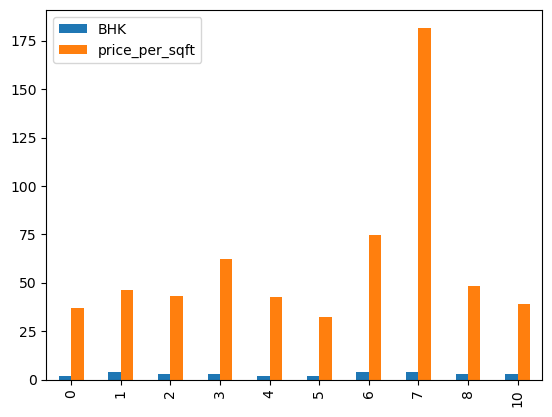

In [43]:
df = data[["BHK","price_per_sqft"]]
df.iloc[0:10,:].plot(kind ="bar")

<Axes: xlabel='BHK', ylabel='price_per_sqft'>

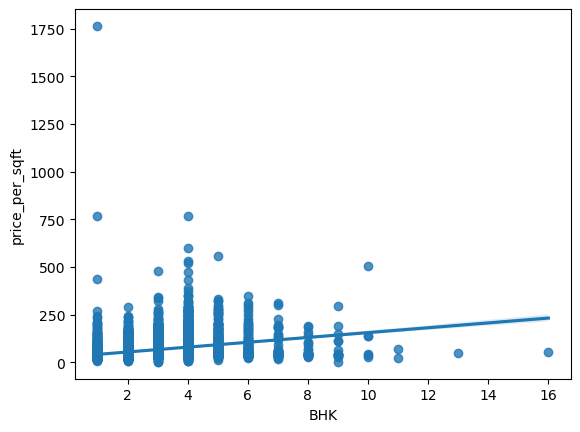

In [44]:
sns.regplot(x= 'BHK', y="price_per_sqft", data = data)

<Axes: xlabel='price_per_sqft'>

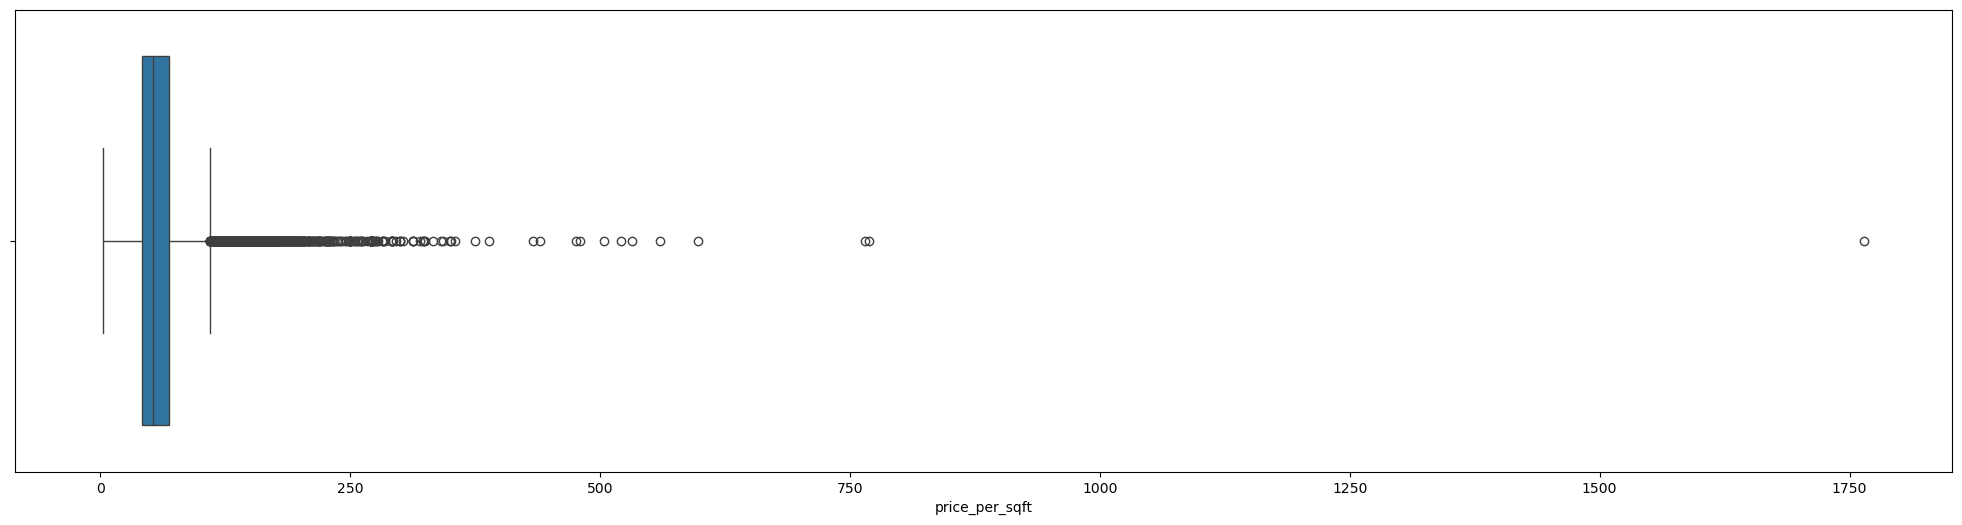

In [45]:
plt.figure(figsize=(25,6))
sns.boxplot(x= 'price_per_sqft', data = data)

<function matplotlib.pyplot.show(close=None, block=None)>

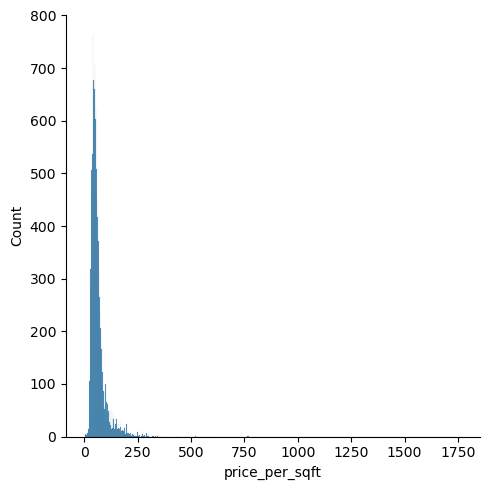

In [46]:
sns.displot(data['price_per_sqft'])
plt.show

In [47]:
#Removing outlinear with the help IQR 
q1 = data['price_per_sqft'].quantile(0.25)
q3 = data['price_per_sqft'].quantile(0.75)

In [48]:
print(q1)
print(q3)

42.10526315789474
69.16666666666667


In [49]:
IQR = q3 - q1

In [50]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)

In [51]:
print(max_range)
print(min_range)

109.75877192982458
1.5131578947368425


In [52]:
data = data[(data['price_per_sqft'] > min_range) & (data['price_per_sqft'] <= max_range)]

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11523 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11523 non-null  object 
 1   size            11523 non-null  object 
 2   total_sqft      11523 non-null  float64
 3   bath            11523 non-null  object 
 4   balcony         11523 non-null  object 
 5   price           11523 non-null  float64
 6   BHK             11523 non-null  int32  
 7   price_per_sqft  11523 non-null  float64
dtypes: float64(3), int32(1), object(4)
memory usage: 765.2+ KB


<Axes: xlabel='price_per_sqft'>

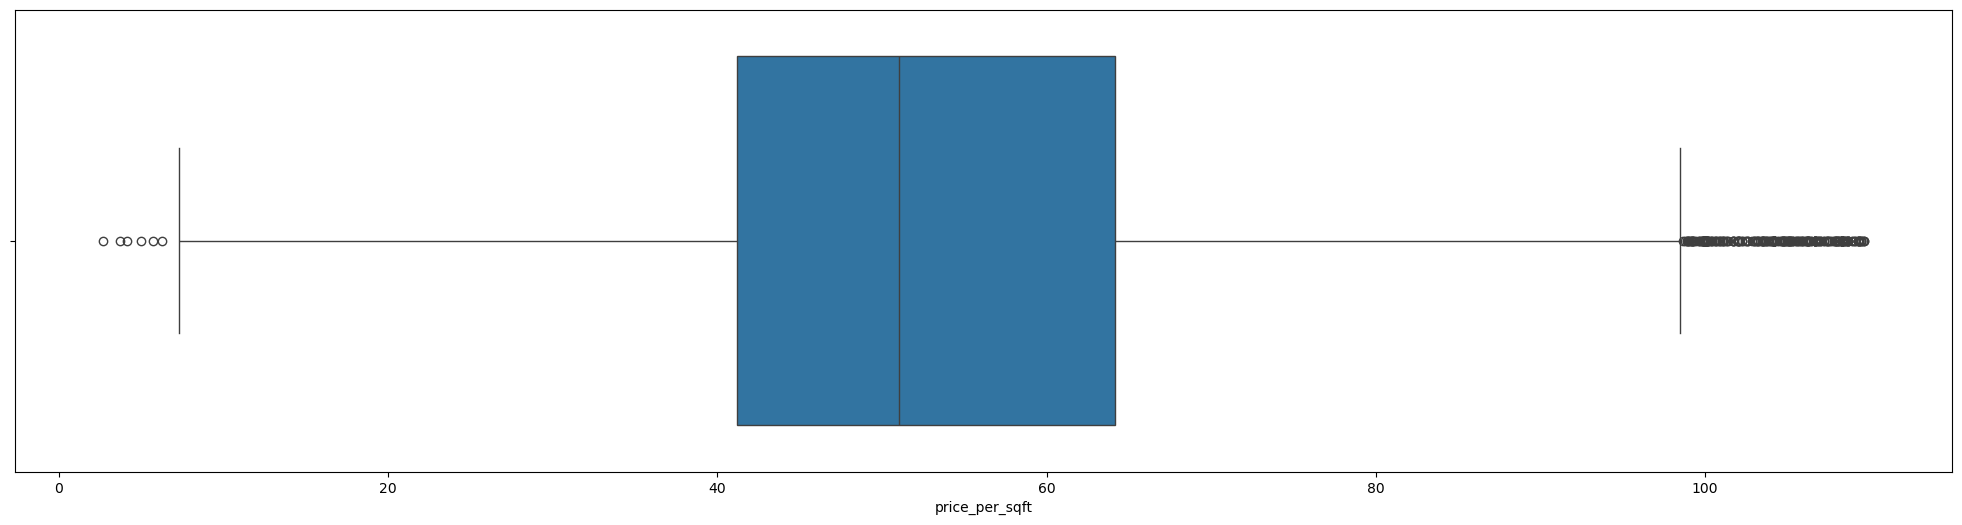

In [54]:
plt.figure(figsize=(25,6))
sns.boxplot(x= 'price_per_sqft', data = data)

In [55]:
q1 = data['BHK'].quantile(0.25)
q3 = data['BHK'].quantile(0.75)
print(q1)
print(q3)

min_range_bed = q1 - (1.5 * IQR)
max_range_bed = q3 + (1.5 * IQR)

print(max_range_bed)
print(min_range_bed)



2.0
3.0
43.5921052631579
-38.5921052631579


In [56]:
data = data[(data['BHK'] <= max_range_bed)]

In [57]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11523 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11523 non-null  object 
 1   size            11523 non-null  object 
 2   total_sqft      11523 non-null  float64
 3   bath            11523 non-null  object 
 4   balcony         11523 non-null  object 
 5   price           11523 non-null  float64
 6   BHK             11523 non-null  int32  
 7   price_per_sqft  11523 non-null  float64
dtypes: float64(3), int32(1), object(4)
memory usage: 765.2+ KB


<Axes: xlabel='BHK'>

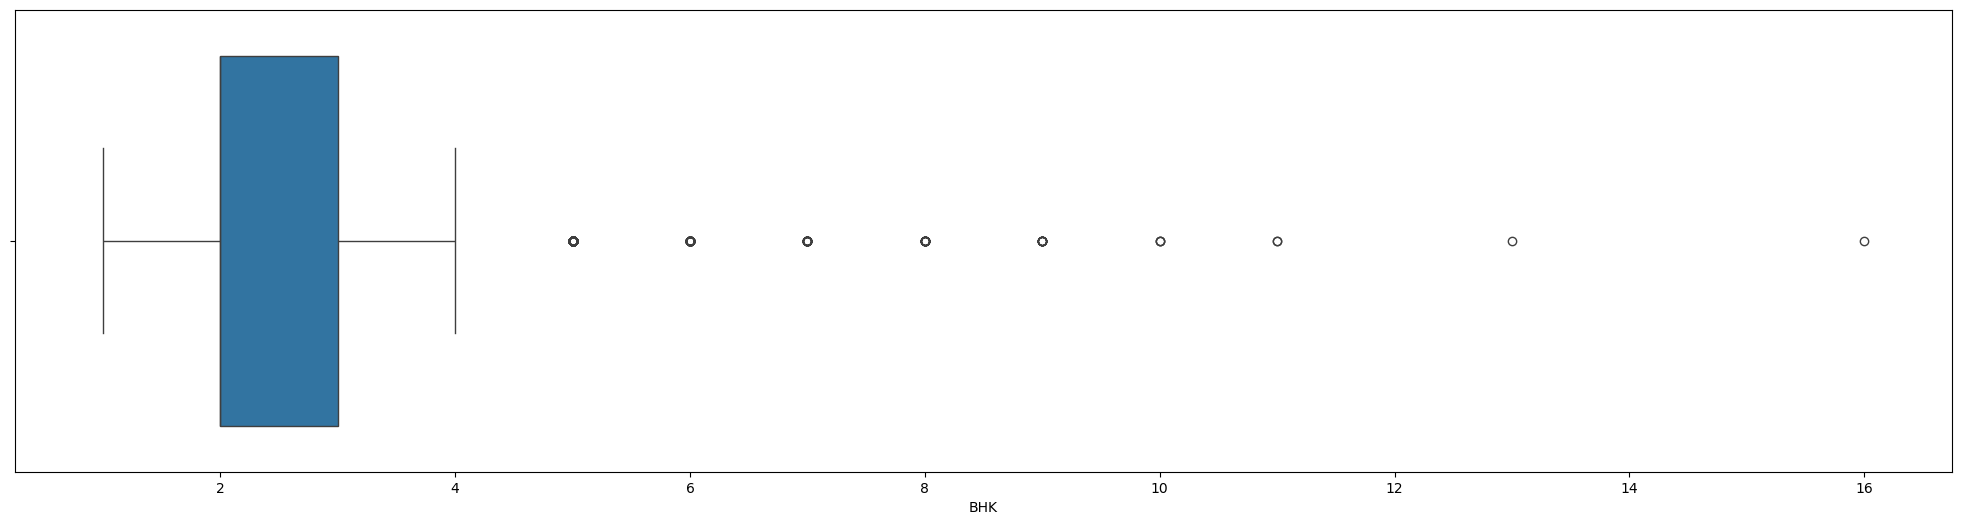

In [58]:
plt.figure(figsize=(25,6))
sns.boxplot(x= 'BHK', data = data)

## Data Evaluation and Model building

In [60]:
data.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,42.500000


In [61]:
data.drop(columns = ['balcony', 'price_per_sqft'], inplace = True)

In [62]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [63]:
#Saving data 
data.to_csv("Cleaned_Housing_data")

In [64]:
data.drop(columns = ['size'], inplace = True)

In [65]:
data.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [66]:
data.to_csv("Cleaned_data_housing")

In [67]:
x = data.drop(columns = ["price"])
y = data['price']

In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11523 entries, 0 to 13319
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    11523 non-null  object 
 1   total_sqft  11523 non-null  float64
 2   bath        11523 non-null  object 
 3   BHK         11523 non-null  int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 405.1+ KB


In [69]:
y.info()

<class 'pandas.core.series.Series'>
Index: 11523 entries, 0 to 13319
Series name: price
Non-Null Count  Dtype  
--------------  -----  
11523 non-null  float64
dtypes: float64(1)
memory usage: 180.0 KB


In [70]:
#Importing req librabies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [71]:
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["location"]),
    remainder="passthrough"
)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.90)

## Appling Linear Regression

In [74]:
lr = LinearRegression()
scaler = StandardScaler()

In [75]:
pipe = make_pipeline(column_trans, scaler, lr)

In [76]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [77]:
y_pred_lr = pipe.predict(x_test)

In [78]:
score_linear = r2_score(y_test, y_pred_lr)

## Apply Laso

In [80]:
lasso = Lasso()

In [81]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [82]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [83]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [84]:
y_pred_lasso = pipe.predict(x_test)

In [85]:
score_lasso = r2_score(y_test, y_pred_lasso)

## Apply Ridge 

In [87]:
ridge = Ridge()

In [88]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [89]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [90]:
y_pred_ridge = pipe.predict(x_test)

In [91]:
score_Ridge = r2_score(y_test, y_pred_ridge)

In [180]:
# Define the data
data = {
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "R² Score": [score_linear, score_lasso, score_Ridge],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Model,R² Score
0,Linear Regression,0.625136
1,Lasso Regression,0.611763
2,Ridge Regression,0.625553
